In [1]:
!pip install matplotlib numpy scipy
%matplotlib widget
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.special import erf # doctest: +SCIPY

Defaulting to user installation because normal site-packages is not writeable


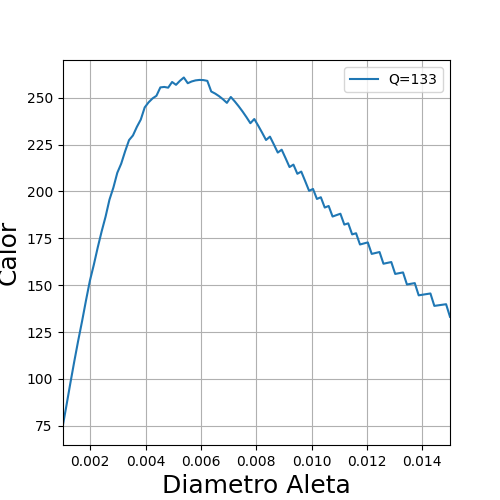

In [7]:


def Longitud_Aleta(a):
    Lf=10*a
    return Lf
    
def h_Convecciòn(a,D):
    hCo = 40*((a/0.005)**0.4)*((D/0.01)**-0.3)
    return hCo
def Area_Aleta (D):
    af = (np.pi*D**2)/4
    return af
def Cantiad_Aletas(W,a,D):
    n = int((W/(a+D))**2)
    return n
def sup_Aletas(af,n):
    Afp = af * n
    return Afp
def sup_SinAletas(W,af):
    As = (W**2)-af
    return As
def Param_Aleta(hCo,D,K,af):
    Beta = ((hCo*np.pi*D)/(K*af))**0.5
    return Beta
def Rendimiento_Aleta(Beta,Lf):
    NF = (np.tanh(Beta*Lf))/(Beta*Lf)
    return NF
def SupCo_Aleta(D,Lf,n):
    AfCo = np.pi*D*Lf*n
    return AfCo
def Resistencia_Aleta(AfCo,hCo,NF):
    Rf = 1/(AfCo*hCo*NF)
    return Rf
def Resistencia_Superficie(As,hCo):
    Rs = 1/(As*hCo)
    return Rs
def Resistencia_Total(Rf,Rs):
    Rt = (Rf*Rs)/(Rf+Rs)
    return Rf
def Calor(Ta,Ts,Rt):
    Q = (Ta-Ts)/Rt
    return Q

#Datos
W=0.1
Ta=120
Ts=20
K=70
D=7.5e-3


a_vec = np.linspace(0.001,0.015,100) 
Q_vec = np.zeros_like(a_vec)
for i,a in enumerate( a_vec ):
    Lf = Longitud_Aleta(a)
    af = Area_Aleta (D)
    hCo = h_Convecciòn(a,D)
    n = Cantiad_Aletas(W,a,D)
    Afp = sup_Aletas(af,n)
    As = sup_SinAletas(W,af)
    Beta = Param_Aleta(hCo,D,K,af)
    NF = Rendimiento_Aleta(Beta,Lf)
    AfCo = SupCo_Aleta(D,Lf,n)
    Rf = Resistencia_Aleta(AfCo,hCo,NF)
    Rs = Resistencia_Superficie(As,hCo)
    Rt = Resistencia_Total(Rf,Rs)
    Q = Calor(Ta,Ts,Rt)
    Q_vec[i] = Q
#Graficos
fig0,ax0 = plt.subplots(1);
# Gráfico. Definimos una figura fig0 y sus ejes ax0

fig0.set_size_inches((5,5));  #tamaño de la figura
ax0.plot(a_vec,Q_vec,label='Q=%.0f'%Q)  # plot sobre los ejes
ax0.set_xlim([min(a_vec),max(a_vec)]);#definimos límites
ax0.set_xlabel('Diametro Aleta',fontsize=18); #nombre para ordenadas
ax0.set_ylabel('Calor',fontsize=18); #nombre para abcisas
ax0.grid(True); #grilla de coordenadas
ax0.legend()

In [13]:
Param_Aleta(hCo,D,K,af)

(1.0, 5)